In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler,QuantileTransformer
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import GammaRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,ExtraTreesRegressor,HistGradientBoostingRegressor,VotingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import TransformerMixin

# Analysis

In [127]:
data=pd.read_csv('train.csv')
data

Id  carat        cut color clarity  depth  table  price    x    y  \
0          1   1.06      Ideal     I     SI2  61.80  57.00   4270 6.57 6.60   
1          2   1.51    Premium     G    VVS2  60.90  58.00  15164 7.38 7.42   
2          3   0.32      Ideal     F     VS2  61.30  56.00    828 4.43 4.41   
3          4   0.53      Ideal     G     VS2  61.20  56.00   1577 5.19 5.22   
4          5   0.70    Premium     H    VVS2  61.00  57.00   2596 5.76 5.72   
...      ...    ...        ...   ...     ...    ...    ...    ...  ...  ...   
43147  43148   0.52      Ideal     E     VS2  61.50  56.00   1760 5.16 5.18   
43148  43149   0.72  Very Good     D     VS2  62.10  59.00   3016 5.70 5.73   
43149  43150   0.44    Premium     I    VVS1  61.50  58.00    990 4.95 4.87   
43150  43151   0.31    Premium     E     VS1  60.20  58.00    734 4.38 4.43   
43151  43152   0.33      Ideal     G     VS2  61.20  55.00    743 4.49 4.46   

         z  
0     4.07  
1     4.51  
2     2.71  
3     3.19  
4     3.50  
...    ...  
43147 3.18  
43148 3.55  
43149 3.02  
43150 2.65  
43151 2.74  

[43152 rows x 11 columns]

In [130]:
data['volume'] = data['x'] * data['y'] * data['z']

# Calculate density
data['density'] = data['carat'] / data['volume']

# Calculate surface area
data['surface_area'] = 2 * (data['x'] * data['y'] + data['x'] * data['z'] + data['y'] * data['z'])

# Calculate aspect ratio
data['aspect_ratio'] = data['x'] / data['y']

# Calculate total depth percentage
data['total_depth_percentage'] = data['depth'] / data['z']

# Calculate table percentage
data['table_percentage'] = data['table'] / data[['x', 'y']].mean(axis=1)

# Calculate symmetry
data['symmetry'] = data['x'] / data['y'] - data['y'] / data['z']


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      43152 non-null  int64  
 1   carat                   43152 non-null  float64
 2   cut                     43152 non-null  object 
 3   color                   43152 non-null  object 
 4   clarity                 43152 non-null  object 
 5   depth                   43152 non-null  float64
 6   table                   43152 non-null  float64
 7   price                   43152 non-null  int64  
 8   x                       43152 non-null  float64
 9   y                       43152 non-null  float64
 10  z                       43152 non-null  float64
 11  volume                  43152 non-null  float64
 12  density                 43152 non-null  float64
 13  surface_area            43152 non-null  float64
 14  aspect_ratio            43148 non-null

In [132]:
data.describe()

Id    carat    depth    table    price        x        y        z  \
count 43152.00 43152.00 43152.00 43152.00 43152.00 43152.00 43152.00 43152.00   
mean  21576.50     0.80    61.75    57.46  3929.49     5.73     5.74     3.54   
std   12457.05     0.47     1.44     2.23  3985.53     1.12     1.15     0.71   
min       1.00     0.20    43.00    43.00   326.00     0.00     0.00     0.00   
25%   10788.75     0.40    61.00    56.00   947.75     4.71     4.72     2.91   
50%   21576.50     0.70    61.80    57.00  2401.00     5.70     5.71     3.53   
75%   32364.25     1.04    62.50    59.00  5312.00     6.54     6.54     4.04   
max   43152.00     5.01    79.00    95.00 18823.00    10.74    58.90    31.80   

        volume  density  surface_area  aspect_ratio  total_depth_percentage  \
count 43152.00 43152.00      43152.00      43148.00                43152.00   
mean    129.85      inf        152.46          1.00                     inf   
std      78.62      NaN         60.36          0.01                     NaN   
min       0.00     0.00          0.00          0.00                    1.94   
25%      65.14     0.01         99.78          0.99                   15.30   
50%     114.83     0.01        145.65          1.00                   17.54   
75%     170.84     0.01        189.87          1.01                   21.20   
max    3840.60      inf       2032.88          1.62                     inf   

       table_percentage  symmetry  
count          43152.00  43148.00  
mean                inf      -inf  
std                 NaN       NaN  
min                1.70      -inf  
25%                8.78     -0.64  
50%               10.17     -0.62  
75%               12.11     -0.60  
max                 inf      0.83

In [133]:
data.isnull().sum()

Id                        0
carat                     0
cut                       0
color                     0
clarity                   0
depth                     0
table                     0
price                     0
x                         0
y                         0
z                         0
volume                    0
density                   0
surface_area              0
aspect_ratio              4
total_depth_percentage    0
table_percentage          0
symmetry                  4
dtype: int64

In [134]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Handle missing values (e.g., replace NaN with mean)
data.fillna(data.median(), inplace=True)

In [135]:
data.duplicated().sum()

0

In [136]:
data=data.drop(['Id'],axis=1)

In [137]:
data.corr()

carat  depth  table  price     x     y     z  volume  \
carat                    1.00   0.02   0.18   0.92  0.98  0.95  0.95    0.97   
depth                    0.02   1.00  -0.30  -0.01 -0.03 -0.03  0.09    0.00   
table                    0.18  -0.30   1.00   0.13  0.20  0.18  0.15    0.17   
price                    0.92  -0.01   0.13   1.00  0.89  0.86  0.86    0.90   
x                        0.98  -0.03   0.20   0.89  1.00  0.97  0.97    0.95   
y                        0.95  -0.03   0.18   0.86  0.97  1.00  0.94    0.97   
z                        0.95   0.09   0.15   0.86  0.97  0.94  1.00    0.94   
volume                   0.97   0.00   0.17   0.90  0.95  0.97  0.94    1.00   
density                  0.20   0.28   0.23   0.14  0.18  0.12  0.15    0.11   
surface_area             0.98   0.00   0.18   0.90  0.98  0.99  0.97    0.99   
aspect_ratio             0.11   0.04   0.12   0.07  0.13 -0.02  0.10    0.02   
total_depth_percentage  -0.92   0.03  -0.19  -0.82 -0.98 -0.95 -0.96   -0.90   
table_percentage        -0.91  -0.04   0.01  -0.81 -0.96 -0.94 -0.94   -0.89   
symmetry                 0.04   0.57  -0.13   0.01  0.02 -0.14  0.10   -0.08   

                        density  surface_area  aspect_ratio  \
carat                      0.20          0.98          0.11   
depth                      0.28          0.00          0.04   
table                      0.23          0.18          0.12   
price                      0.14          0.90          0.07   
x                          0.18          0.98          0.13   
y                          0.12          0.99         -0.02   
z                          0.15          0.97          0.10   
volume                     0.11          0.99          0.02   
density                    1.00          0.13          0.27   
surface_area               0.13          1.00          0.05   
aspect_ratio               0.27          0.05          1.00   
total_depth_percentage    -0.13         -0.95         -0.10   
table_percentage          -0.13         -0.93         -0.08   
symmetry                   0.02         -0.04          0.51   

                        total_depth_percentage  table_percentage  symmetry  
carat                                    -0.92             -0.91      0.04  
depth                                     0.03             -0.04      0.57  
table                                    -0.19              0.01     -0.13  
price                                    -0.82             -0.81      0.01  
x                                        -0.98             -0.96      0.02  
y                                        -0.95             -0.94     -0.14  
z                                        -0.96             -0.94      0.10  
volume                                   -0.90             -0.89     -0.08  
density                                  -0.13             -0.13      0.02  
surface_area                             -0.95             -0.93     -0.04  
aspect_ratio                             -0.10             -0.08      0.51  
total_depth_percentage                    1.00              0.97     -0.05  
table_percentage                          0.97              1.00     -0.03  
symmetry                                 -0.05             -0.03      1.00

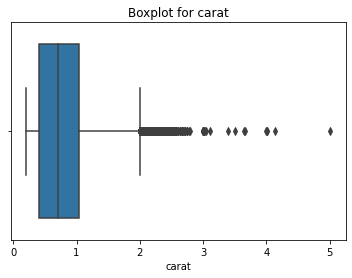

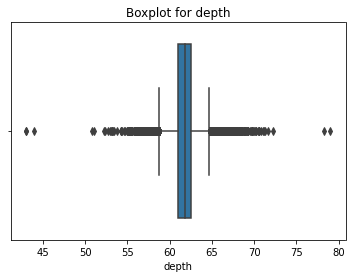

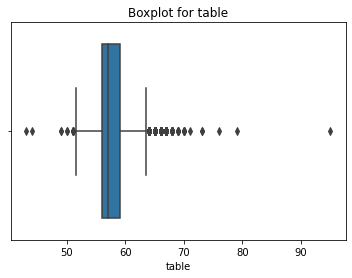

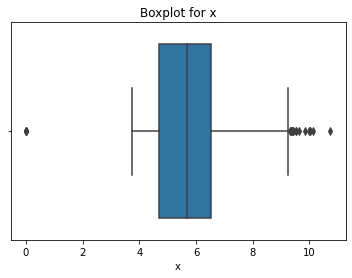

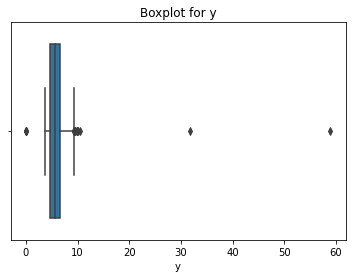

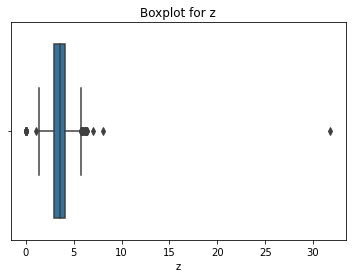

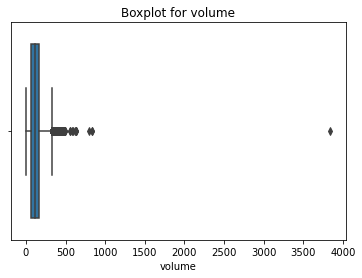

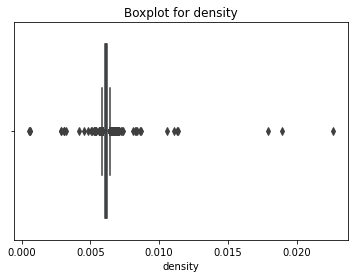

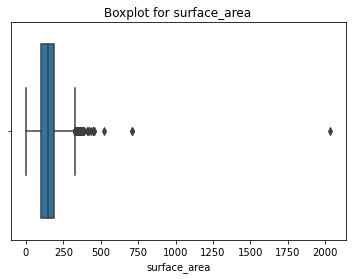

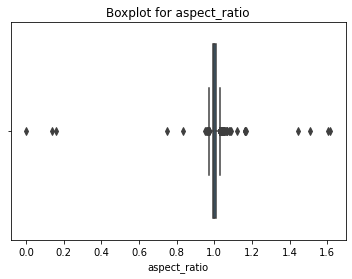

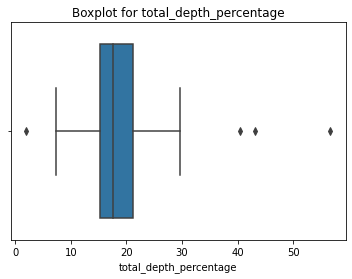

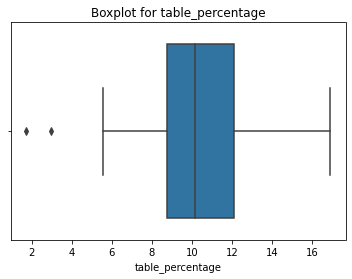

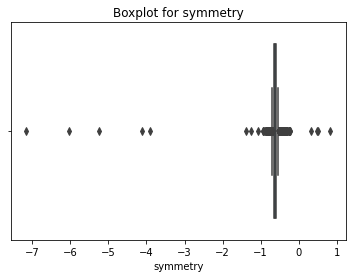

In [11]:
# this one for showing boxplots

numeric_cols = data.select_dtypes(include=['number']).columns
for col in numeric_cols:
    if col not in 'price':
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=data[col])
        plt.title(f'Boxplot for {col}')
        plt.show()

# Feature Engineering

In [13]:
'''def impute_outliers_with_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
num_features = data.select_dtypes(include=[np.number]).columns
for feature in num_features:
    if feature not in 'price':
        data[feature] = impute_outliers_with_bounds(data[feature])'''

"def impute_outliers_with_bounds(series):\n    Q1 = series.quantile(0.25)\n    Q3 = series.quantile(0.75)\n    IQR = Q3 - Q1\n    lower_bound = Q1 - 1.5 * IQR\n    upper_bound = Q3 + 1.5 * IQR\n    return series.apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)\nnum_features = data.select_dtypes(include=[np.number]).columns\nfor feature in num_features:\n    if feature not in 'price':\n        data[feature] = impute_outliers_with_bounds(data[feature])"

In [14]:
'''numeric_cols = data.select_dtypes(include=['number']).columns
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()'''

"numeric_cols = data.select_dtypes(include=['number']).columns\nfor col in numeric_cols:\n    plt.figure(figsize=(6, 4))\n    sns.boxplot(x=data[col])\n    plt.title(f'Boxplot for {col}')\n    plt.show()"

In [138]:
label_encoder = LabelEncoder()

In [139]:
data['color'] = label_encoder.fit_transform(data['color'])
data['cut'] = label_encoder.fit_transform(data['cut'])
data['clarity'] = label_encoder.fit_transform(data['clarity'])

In [140]:
data

carat  cut  color  clarity  depth  table  price    x    y    z  volume  \
0       1.06    2      5        3  61.80  57.00   4270 6.57 6.60 4.07  176.48   
1       1.51    3      3        7  60.90  58.00  15164 7.38 7.42 4.51  246.97   
2       0.32    2      2        5  61.30  56.00    828 4.43 4.41 2.71   52.94   
3       0.53    2      3        5  61.20  56.00   1577 5.19 5.22 3.19   86.42   
4       0.70    3      4        7  61.00  57.00   2596 5.76 5.72 3.50  115.32   
...      ...  ...    ...      ...    ...    ...    ...  ...  ...  ...     ...   
43147   0.52    2      1        5  61.50  56.00   1760 5.16 5.18 3.18   85.00   
43148   0.72    4      0        5  62.10  59.00   3016 5.70 5.73 3.55  115.95   
43149   0.44    3      5        6  61.50  58.00    990 4.95 4.87 3.02   72.80   
43150   0.31    3      1        4  60.20  58.00    734 4.38 4.43 2.65   51.42   
43151   0.33    2      3        5  61.20  55.00    743 4.49 4.46 2.74   54.87   

       density  surface_area  aspect_ratio  total_depth_percentage  \
0         0.01        193.93          1.00                   15.18   
1         0.01        243.02          0.99                   13.50   
2         0.01         86.99          1.00                   22.62   
3         0.01        120.60          0.99                   19.18   
4         0.01        146.25          1.01                   17.43   
...        ...           ...           ...                     ...   
43147     0.01        119.22          1.00                   19.34   
43148     0.01        146.47          0.99                   17.49   
43149     0.01        107.53          1.02                   20.36   
43150     0.01         85.50          0.99                   22.72   
43151     0.01         89.10          1.01                   22.34   

       table_percentage  symmetry  
0                  8.66     -0.63  
1                  7.84     -0.65  
2                 12.67     -0.62  
3                 10.76     -0.64  
4                  9.93     -0.63  
...                 ...       ...  
43147             10.83     -0.63  
43148             10.32     -0.62  
43149             11.81     -0.60  
43150             13.17     -0.68  
43151             12.29     -0.62  

[43152 rows x 17 columns]

In [142]:
ss=StandardScaler()
mm=MinMaxScaler()
rs=RobustScaler()
qt=QuantileTransformer()

In [143]:
data['carat'] =qt.fit_transform(data[['carat']])
data['depth'] =qt.fit_transform(data[['depth']])
data['table'] =qt.fit_transform(data[['table']])
data['x'] =qt.fit_transform(data[['x']])
data['y'] =qt.fit_transform(data[['y']])
data['z'] =qt.fit_transform(data[['z']])
data['volume'] =qt.fit_transform(data[['volume']])
data['density'] =qt.fit_transform(data[['density']])
data['surface_area'] =qt.fit_transform(data[['surface_area']])
data['aspect_ratio'] =qt.fit_transform(data[['aspect_ratio']])
data['total_depth_percentage'] =qt.fit_transform(data[['total_depth_percentage']])
data['table_percentage'] =qt.fit_transform(data[['table_percentage']])

In [144]:
data

carat  cut  color  clarity  depth  table  price    x    y    z  volume  \
0       0.76    2      5        3   0.48   0.46   4270 0.76 0.77 0.77    0.77   
1       0.91    3      3        7   0.22   0.63  15164 0.91 0.92 0.90    0.92   
2       0.14    2      2        5   0.32   0.28    828 0.15 0.13 0.12    0.14   
3       0.39    2      3        5   0.29   0.28   1577 0.38 0.39 0.37    0.39   
4       0.49    3      4        7   0.24   0.46   2596 0.53 0.50 0.49    0.51   
...      ...  ...    ...      ...    ...    ...    ...  ...  ...  ...     ...   
43147   0.38    2      1        5   0.38   0.28   1760 0.37 0.38 0.37    0.38   
43148   0.54    4      0        5   0.60   0.77   3016 0.50 0.51 0.52    0.51   
43149   0.32    3      5        6   0.38   0.63    990 0.32 0.31 0.32    0.32   
43150   0.10    3      1        4   0.12   0.63    734 0.12 0.15 0.05    0.11   
43151   0.16    2      3        5   0.29   0.12    743 0.18 0.17 0.16    0.17   

       density  surface_area  aspect_ratio  total_depth_percentage  \
0         0.14          0.77          0.47                    0.23   
1         0.49          0.92          0.41                    0.08   
2         0.24          0.14          0.62                    0.85   
3         0.56          0.39          0.40                    0.61   
4         0.32          0.51          0.75                    0.48   
...        ...           ...           ...                     ...   
43147     0.50          0.37          0.52                    0.62   
43148     0.80          0.51          0.42                    0.49   
43149     0.24          0.32          0.98                    0.68   
43150     0.19          0.11          0.07                    0.87   
43151     0.15          0.17          0.73                    0.82   

       table_percentage  symmetry  
0                  0.22     -0.63  
1                  0.08     -0.65  
2                  0.84     -0.62  
3                  0.59     -0.64  
4                  0.47     -0.63  
...                 ...       ...  
43147              0.60     -0.63  
43148              0.52     -0.62  
43149              0.71     -0.60  
43150              0.91     -0.68  
43151              0.78     -0.62  

[43152 rows x 17 columns]

In [216]:
x=data.drop(['price'],axis=1)
y=data.price

# Building Models

In [22]:
# never run this

regressors = [
    LinearRegression(),
    GammaRegressor(),
    SVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    MLPRegressor(),
    AdaBoostRegressor(),
    PassiveAggressiveRegressor(),
    KNeighborsRegressor(),
    HistGradientBoostingRegressor(),
    LGBMRegressor(),
    ExtraTreeRegressor(),
    XGBRegressor()
]
n=5
acclist=[]
acclist1=[]
accs=dict()
accs1=dict()
for regressor in regressors:
    acclist=[]
    acclist1=[]
    for i in range(n):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
        regressor.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)
        acc = r2_score(y_test, y_pred)
        acc1 = np.sqrt(mean_squared_error(y_test, y_pred))
        acclist.append(acc)
        acclist1.append(acc1)
    accs[regressor]=[np.mean(acclist),np.std(acclist)]
    accs1[regressor]=[np.mean(acclist1),np.std(acclist1)]
display(accs)
display(accs1)

C:\Users\W10\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\W10\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\W10\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\W10\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\W10\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perc

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001704 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2284
[LightGBM] [Info] Number of data points in the train set: 34518, number of used features: 13
[LightGBM] [Info] Start training from score 3935.592734
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007912 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2280
[LightGBM] [Info] Number of data points in the train set: 34518, number of used features: 13
[LightGBM] [Info] Start training from score 3932.457211
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003164 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2283
[LightGBM] [Info] Number of data points in the tra

{LinearRegression(): [0.7245139160373613, 0.002275141898168109],
 GammaRegressor(): [0.39242531053324614, 0.007577460333722839],
 SVR(): [0.16891702227432506, 0.008344775291540393],
 DecisionTreeRegressor(): [0.964173633645594, 0.0019367712051872217],
 RandomForestRegressor(): [0.9815679226487216, 0.0009318016690780432],
 MLPRegressor(): [0.7598568495465536, 0.03910663827689101],
 AdaBoostRegressor(): [0.8865985110697956, 0.005303611988884473],
 PassiveAggressiveRegressor(): [0.6452622615678798, 0.009597352340553698],
 KNeighborsRegressor(): [0.9086784102185158, 0.003856604989844193],
 HistGradientBoostingRegressor(): [0.9817083002186389, 0.0007674388163625641],
 LGBMRegressor(): [0.9814124755178666, 0.0006607936415550459],
 ExtraTreeRegressor(): [0.9587493003094879, 0.002047285421774092],
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,

{LinearRegression(): [2109.3213449300224, 25.16473104382102],
 GammaRegressor(): [3115.96642190468, 50.67546809537252],
 SVR(): [3648.206230711995, 53.01319841779426],
 DecisionTreeRegressor(): [749.9139701590295, 18.05055254633971],
 RandomForestRegressor(): [540.8699078314022, 14.847269918622299],
 MLPRegressor(): [1947.0518133476476, 167.4206650054957],
 AdaBoostRegressor(): [1343.5502625488855, 35.848485459327485],
 PassiveAggressiveRegressor(): [2381.153241317889, 43.2270439957962],
 KNeighborsRegressor(): [1210.2165761370932, 21.235600662079914],
 HistGradientBoostingRegressor(): [533.596784017983, 14.090643307570371],
 LGBMRegressor(): [546.150216190382, 12.454780519841597],
 ExtraTreeRegressor(): [815.1862457325749, 14.745531764453395],
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_

In [19]:
x=data.drop(['price'],axis=1)
y=data.price
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=42)
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)
display(r2_score(y_pred,y_test))
display(np.sqrt(mean_squared_error(y_pred,y_test)))

0.9805594231235477

541.8449461046656

In [145]:
x=data.drop(['price','z','x','y'],axis=1)
y=data.price
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y, test_size = 0.2)
lgpm=LGBMRegressor(learning_rate=0.041,max_depth=7, n_estimators=600)
lgpm.fit(X_train1,y_train1)
y_pred4 = lgpm.predict(X_test1)
display(r2_score(y_pred4,y_test1))
display(np.sqrt(mean_squared_error(y_pred4,y_test1)))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006767 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2283
[LightGBM] [Info] Number of data points in the train set: 34521, number of used features: 13
[LightGBM] [Info] Start training from score 3924.118768
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

0.9829033433111746

516.6855656072878

In [89]:
model1 = RandomForestRegressor(n_estimators=100)
model2 = HistGradientBoostingRegressor()
model3 = LGBMRegressor()
model4 =  XGBRegressor()
voting_regressor = VotingRegressor([('rf', model1), ('gb', model2), ('lg', model3),('xg', model4)])

# Step 4: Train the ensemble model
voting_regressor.fit(X_train1, y_train1)

# Step 5: Evaluate the model performance
y_pred = voting_regressor.predict(X_test1)
mse = mean_squared_error(y_test1, y_pred)
display(r2_score(y_pred,y_test1))
print("Mean Squared Error:", np.sqrt(mse))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2282
[LightGBM] [Info] Number of data points in the train set: 34521, number of used features: 13
[LightGBM] [Info] Start training from score 3938.412676


0.9825359792434372

Mean Squared Error: 516.2564762801607


In [146]:
model1 = RandomForestRegressor()
model2 = HistGradientBoostingRegressor(learning_rate= 0.1,max_depth=9)
model3 = LGBMRegressor(learning_rate=0.041,max_depth=7, n_estimators=600)
model4 = XGBRegressor(learning_rate=0.1, max_depth= 7)
voting_regressor = VotingRegressor([('rf', model1), ('gb', model2), ('lg', model3),('xg', model4)])

# Step 4: Train the ensemble model
voting_regressor.fit(X_train1, y_train1)

# Step 5: Evaluate the model performance
y_pred = voting_regressor.predict(X_test1)
mse = mean_squared_error(y_test1, y_pred)
display(r2_score(y_pred,y_test1))
print("Mean Squared Error:", np.sqrt(mse))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2283
[LightGBM] [Info] Number of data points in the train set: 34521, number of used features: 13
[LightGBM] [Info] Start training from score 3924.118768
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

0.9830696966517056

Mean Squared Error: 513.5362796535518


In [631]:
# NEVER EVER RUN THIS UNLESS YOU ARE 100 PERCENT SURE

param_grid = {
    'n_estimators': np.arange(600, 700, 20),
    'learning_rate': np.arange(0.04, 0.045, 0.001),
    'max_depth': np.arange(5, 8, 1),
    #'num_leaves': np.arange(20, 41, 5), 
    #'min_child_samples': np.arange(10, 31, 5), 
    #'reg_alpha': [0, 0.1, 0.5, 1.0], 
    #'reg_lambda': [0, 0.1, 0.5, 1.0] 
}
lgbm = LGBMRegressor()
grid_search = GridSearchCV(lgbm, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train1, y_train1)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2513
[LightGBM] [Info] Number of data points in the train set: 23014, number of used features: 14
[LightGBM] [Info] Start training from score 3922.870905
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

In [ ]:
param_grid = {
    'n_estimators': np.arange(100, 1000, 100),
}
rf = RandomForestRegressor()
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train1, y_train1)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

In [49]:
param_grid = {
    'learning_rate': np.arange(0.1, 1, 0.1),
    'max_depth': np.arange(9, 19, 1), 
}
gb = HistGradientBoostingRegressor()
grid_search = GridSearchCV(gb, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train1, y_train1)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 13}


In [48]:
param_grid = {
    'learning_rate': np.arange(0.1, 1, 0.1),
    'max_depth': np.arange(1, 10, 1), 
}
xg = XGBRegressor()
grid_search = GridSearchCV(xg, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train1, y_train1)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 7}


In [24]:
x3=data.drop(['price'],axis=1)
y3=data.price
X_train2, X_test2, y_train2, y_test2 = train_test_split(x3, y3, test_size = 0.2)
hg=HistGradientBoostingRegressor()
hg.fit(X_train2,y_train2)
y_pred5 = hg.predict(X_test2)
display(r2_score(y_pred5,y_test2))
display(np.sqrt(mean_squared_error(y_pred5,y_test2)))

0.9789212059687933

567.7599548025245

# Testing

In [147]:
test=pd.read_csv('test.csv')
test

Id  carat        cut color clarity  depth  table    x    y    z
0          1   0.34      Ideal     G    VVS2  61.10  57.00 4.52 4.48 2.75
1          2   0.71    Premium     E     VS2  62.70  58.00 5.74 5.68 3.58
2          3   0.44  Very Good     I     VS1  62.80  56.00 4.83 4.88 3.05
3          4   0.81    Premium     E     SI2  60.10  59.00 6.09 6.03 3.65
4          5   0.40      Ideal     G    VVS1  61.20  56.00 4.74 4.80 2.92
...      ...    ...        ...   ...     ...    ...    ...  ...  ...  ...
10783  10784   0.57      Ideal     H     VS1  60.90  56.00 5.34 5.36 3.26
10784  10785   1.05      Ideal     G     VS2  60.80  57.00 6.65 6.58 4.02
10785  10786   0.71      Ideal     E    VVS1  62.30  55.00 5.68 5.72 3.55
10786  10787   1.11    Premium     E     SI2  61.00  60.00 6.68 6.66 4.07
10787  10788   2.00    Premium     F     SI2  61.50  59.00 8.03 7.95 4.92

[10788 rows x 10 columns]

In [148]:
test['volume'] = test['x'] * test['y'] * test['z']
test['density'] = test['carat'] / test['volume']
test['surface_area'] = 2 * (test['x'] * test['y'] + test['x'] * test['z'] + test['y'] * test['z'])
test['aspect_ratio'] = test['x'] / test['y']
test['total_depth_percentage'] = test['depth'] / test['z']
test['table_percentage'] = test['table'] / test[['x', 'y']].mean(axis=1)
test['symmetry'] = test['x'] / test['y'] - test['y'] / data['z']

In [149]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10788 entries, 0 to 10787
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      10788 non-null  int64  
 1   carat                   10788 non-null  float64
 2   cut                     10788 non-null  object 
 3   color                   10788 non-null  object 
 4   clarity                 10788 non-null  object 
 5   depth                   10788 non-null  float64
 6   table                   10788 non-null  float64
 7   x                       10788 non-null  float64
 8   y                       10788 non-null  float64
 9   z                       10788 non-null  float64
 10  volume                  10788 non-null  float64
 11  density                 10788 non-null  float64
 12  surface_area            10788 non-null  float64
 13  aspect_ratio            10785 non-null  float64
 14  total_depth_percentage  10788 non-null

In [150]:
test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Handle missing values (e.g., replace NaN with mean)
test.fillna(data.median(), inplace=True)

In [151]:
test.isnull().sum()

Id                        0
carat                     0
cut                       0
color                     0
clarity                   0
depth                     0
table                     0
x                         0
y                         0
z                         0
volume                    0
density                   0
surface_area              0
aspect_ratio              0
total_depth_percentage    0
table_percentage          0
symmetry                  0
dtype: int64

In [541]:
test.fillna(data['aspect_ratio'].mean(),inplace=True)

In [ ]:
#num_features = test.select_dtypes(include=[np.number]).columns
#for feature in num_features:
 #   if feature not in 'price':
  #      data[feature] = impute_outliers_with_bounds(data[feature])

In [29]:
test

Id  carat        cut color clarity  depth  table     x     y     z  \
0          1   0.34      Ideal     G    VVS2   61.1   57.0  4.52  4.48  2.75   
1          2   0.71    Premium     E     VS2   62.7   58.0  5.74  5.68  3.58   
2          3   0.44  Very Good     I     VS1   62.8   56.0  4.83  4.88  3.05   
3          4   0.81    Premium     E     SI2   60.1   59.0  6.09  6.03  3.65   
4          5   0.40      Ideal     G    VVS1   61.2   56.0  4.74  4.80  2.92   
...      ...    ...        ...   ...     ...    ...    ...   ...   ...   ...   
10783  10784   0.57      Ideal     H     VS1   60.9   56.0  5.34  5.36  3.26   
10784  10785   1.05      Ideal     G     VS2   60.8   57.0  6.65  6.58  4.02   
10785  10786   0.71      Ideal     E    VVS1   62.3   55.0  5.68  5.72  3.55   
10786  10787   1.11    Premium     E     SI2   61.0   60.0  6.68  6.66  4.07   
10787  10788   2.00    Premium     F     SI2   61.5   59.0  8.03  7.95  4.92   

           volume   density  surface_area  aspect_ratio  \
0       55.686400  0.006106       89.9992      1.008929   
1      116.719456  0.006083      146.9736      1.010563   
2       71.889720  0.006120      106.3718      0.989754   
3      134.037855  0.006043      161.9214      1.009950   
4       66.435840  0.006021      101.2176      0.987500   
...           ...       ...           ...           ...   
10783   93.309024  0.006109      127.0088      0.996269   
10784  175.903140  0.005969      193.8832      1.010638   
10785  115.338080  0.006156      145.9192      0.993007   
10786  181.069416  0.006130      197.5652      1.003003   
10787  314.085420  0.006368      284.9202      1.010063   

       total_depth_percentage  table_percentage   symmetry  
0                   22.218182         12.666667  -4.780877  
1                   17.513966         10.157618  -5.318851  
2                   20.590164         11.534501 -38.970246  
3                   16.465753          9.735974 -15.118483  
4                   20.958904         11.740042  -8.889328  
...                       ...               ...        ...  
10783               18.680982         10.467290  -7.861697  
10784               15.124378          8.616780  -7.926710  
10785               17.549296          9.649123 -41.334993  
10786               14.987715          8.995502  -8.167693  
10787               12.500000          7.384230 -12.600991  

[10788 rows x 17 columns]

In [152]:
test['color'] = label_encoder.fit_transform(test['color'])
test['cut'] = label_encoder.fit_transform(test['cut'])
test['clarity'] = label_encoder.fit_transform(test['clarity'])
test['carat'] =qt.fit_transform(test[['carat']])
test['depth'] =qt.fit_transform(test[['depth']])
test['table'] =qt.fit_transform(test[['table']])
test['x'] =qt.fit_transform(test[['x']])
test['y'] =qt.fit_transform(test[['y']])
test['z'] =qt.fit_transform(test[['z']])
test['volume'] =qt.fit_transform(test[['volume']])
test['density'] =qt.fit_transform(test[['density']])
test['surface_area'] =qt.fit_transform(test[['surface_area']])
test['aspect_ratio'] =qt.fit_transform(test[['aspect_ratio']])
test['table_percentage'] =qt.fit_transform(test[['table_percentage']])
test['total_depth_percentage'] =qt.fit_transform(test[['total_depth_percentage']])
test['symmetry'] =qt.fit_transform(test[['symmetry']])

In [153]:
test.isnull().sum()

Id                        0
carat                     0
cut                       0
color                     0
clarity                   0
depth                     0
table                     0
x                         0
y                         0
z                         0
volume                    0
density                   0
surface_area              0
aspect_ratio              0
total_depth_percentage    0
table_percentage          0
symmetry                  0
dtype: int64

In [72]:
x=data.drop(['price','x','y','z'],axis=1)
y=data.price
model1 = RandomForestRegressor(n_estimators=600)
model2 = HistGradientBoostingRegressor(learning_rate=0.1,max_depth=13)
model3 = LGBMRegressor(learning_rate=0.041,max_depth=7, n_estimators=600)
model4 = XGBRegressor()
model6 = ExtraTreesRegressor(n_estimators=600)
voting_regressor = VotingRegressor([('rf', model1), ('gb', model2), ('lg', model3),('xg', model4),('etr',model6)])

# Step 4: Train the ensemble model
voting_regressor.fit(x,y)
test['price']=voting_regressor.predict(test.drop(['id','price','x','y','z'],axis=1))
test.rename(columns={'Id': 'id'}, inplace=True)
test50=test[['id','price']]
test50

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001805 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2292
[LightGBM] [Info] Number of data points in the train set: 43152, number of used features: 13
[LightGBM] [Info] Start training from score 3929.491912
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

id    price
0          1   967.65
1          2  2878.67
2          3   805.20
3          4  2845.54
4          5  1106.48
...      ...      ...
10783  10784  1735.72
10784  10785  6499.96
10785  10786  4500.65
10786  10787  4734.08
10787  10788 13891.51

[10788 rows x 2 columns]

In [73]:
test50.to_csv('final_sub50.csv',index=False)